# Exploratory Data Analysis

#### Import Libraries

In [25]:
import pandas as pd
import googlemaps

import numpy as np

import requests

import openpyxl

import matplotlib.pyplot as plt
import datetime

import seaborn as sns

#### Load Dataset

In [26]:
# Load the Excel file into a pandas DataFrame
df = pd.read_excel('../data/transaction/v1.xlsx')
df.head()

,id,id_telp,email,tanggal,jenis_pesanan,datetime_tugas,lokasi_jemput,lat_jemput,long_jemput,lokasi_tujuan,lat_tujuan,long_tujuan,datetime_selesai,jarak,pendapatan_bersih,poin_tambahan,jenis_pembayaran,jarak_jemput_tujuan,perbedaan_jarak
0,16029,8.132182e+10,purwaramadhika@gmail.com,2023-05-04 00:00:00,Kurir Barang,2023-05-04 05:06:00,"komp gading tutuka 2 blok k8 no 8, Cingcin, Ke...",-7.021726,107.505362,"Jl. Gading Tutuka 2 No.42, Ciluncat, Kec. Cang...",-7.043931,107.540715,2023-05-04 05:31:00,2.50,8800,100.0,Dompet + Tunai,7.490,4.990
1,27243,NaN,deerah60@gmail.com,2023-05-08 00:00:00,Food,2023-05-08 11:23:00,Jl. Dakota 28 Sukaraja Cicendo Bandung,-6.894789,107.569360,"No.154. Jalan Papajaran, Husen Sastranegara",-6.904878,107.579212,2023-05-08 11:51:00,1.89,7200,150.0,Dompet,6.880,4.990
2,14783,8.129765e+10,mrayfan17@gmail.com,2023-05-11 00:00:00,Food,2023-05-11 19:06:00,"Jl. Terusan Jakarta No.6, Babakan Surabaya, Ke...",-6.913613,107.645752,"Jl. Soekarno Hatta, Babakan Penghulu, Bandung ...",-6.937207,107.690535,2023-05-11 19:26:00,4.71,12000,150.0,Tunai,9.698,4.988
3,26411,NaN,daddykurniadi4647@gmail.com,2023-05-02 00:00:00,Food,2023-05-02 19:24:00,GF- Outdoor JL Ciumbuleuit No 147. He...,-6.875969,107.604215,"Jl. Cipaku Indah X No.39, Ledeng, Kec...",-6.859268,107.600874,2023-05-02 19:37:00,2.36,8800,150.0,Dompet,7.347,4.987
4,16842,8.122494e+10,amrytaufikblur@gmail.com,2023-05-14 00:00:00,Ride,2023-05-14 08:00:00,"jl dipatiukur no 107, lebakgede",-6.885659,107.614298,4J4F+4GM jalan gagak dalam,-6.931904,107.627052,2023-05-14 08:09:00,1.99,8000,150.0,Dompet,6.972,4.982


1. Jumlah pesanan tiap waktu -> time series

In [27]:
# Convert 'datetime_tugas' column to datetime type
df['datetime_tugas'] = pd.to_datetime(df['datetime_tugas'])

In [28]:
# Group data by hour and count the number of trips (ids)
grouped_data = df.groupby(df['datetime_tugas'].dt.hour)['id'].count()

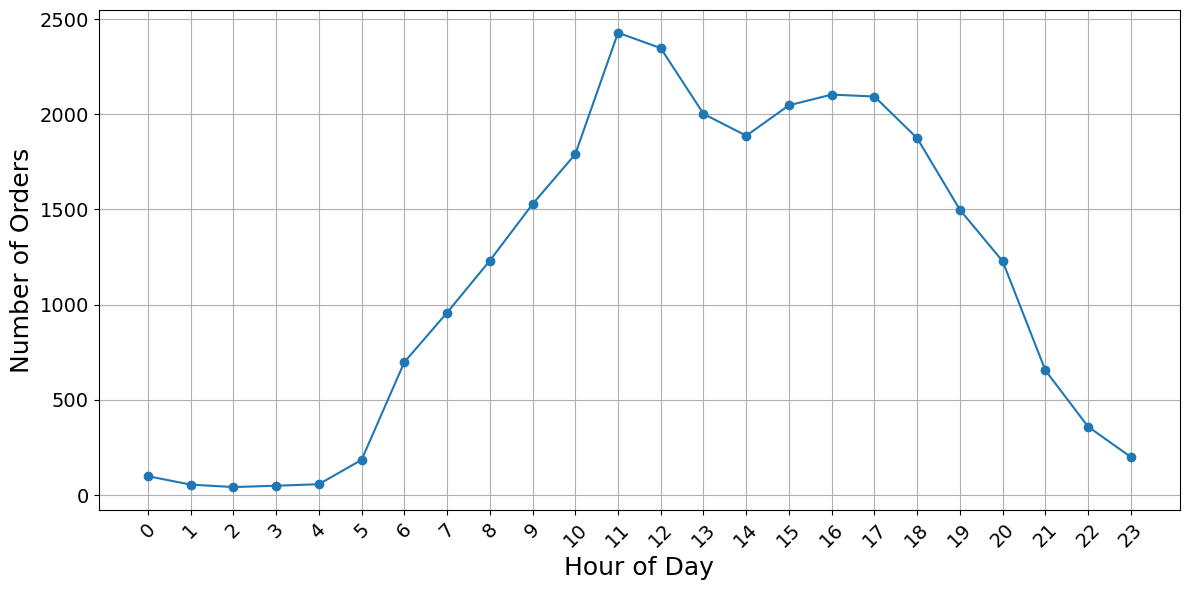

In [29]:
# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data.values, marker='o')

# plt.title('MSTP Orders Count by Hour Over a 14-Day Period')
plt.xlabel('Hour of Day', fontsize=18)
plt.ylabel('Number of Orders', fontsize=18)

# Set x-ticks to be hourly and rotate them for readability
plt.xticks(range(24), rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Enlarge the legend and adjust font size
# legend = plt.legend(fontsize=16)
# legend.set_title('Order Types', prop={'size': 18})  # Adjust legend title size

# Display both x and y grids
plt.gca().xaxis.grid(True)
plt.gca().yaxis.grid(True)

plt.tight_layout()
plt.show()

2. Dikelompokkan per jenis pesanan

In [30]:
# Group data by hour and trip type, then count the number of trips
grouped_data_type = df.groupby([df['datetime_tugas'].dt.hour, 'jenis_pesanan'])['id'].count().unstack()

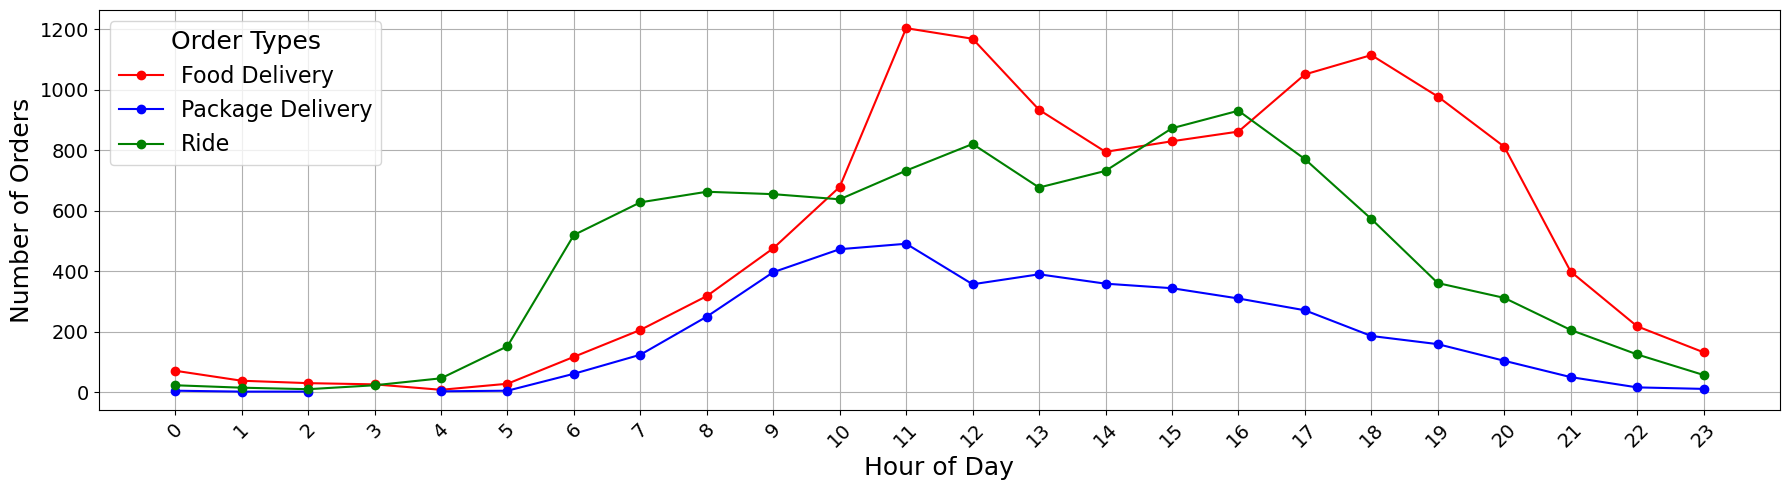

In [31]:
# Create a time series plot for each trip type
plt.figure(figsize=(18, 5))

# Define custom colors for each trip type
colors = {'Food': 'red', 'Ride': 'green', 'Kurir Barang': 'blue'}
labels = {'Food': 'Food Delivery', 'Ride': 'Ride', 'Kurir Barang': 'Package Delivery'}

for jenis_pesanan in grouped_data_type.columns:
    plt.plot(grouped_data_type.index, grouped_data_type[jenis_pesanan], marker='o', label=labels.get(jenis_pesanan, jenis_pesanan), color=colors.get(jenis_pesanan, 'black'))

# Set the title and adjust font size
# plt.title('MSTP Orders Count by Hour and Order Type Over a 14-Day Period', fontsize=16)

# Set x and y labels with adjusted font size
plt.xlabel('Hour of Day', fontsize=18)
plt.ylabel('Number of Orders', fontsize=18)

# Set x-ticks to be hourly and rotate them for readability
plt.xticks(range(24), rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Enlarge the legend and adjust font size
legend = plt.legend(fontsize=16)
legend.set_title('Order Types', prop={'size': 18})  # Adjust legend title size

# Display both x and y grids
plt.gca().xaxis.grid(True)
plt.gca().yaxis.grid(True)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


3. Komparasi Weekend & Weekday

In [32]:
# Group data by day of the week and hour, then count the number of trips
df['weekday'] = df['datetime_tugas'].dt.dayofweek
grouped_data_week = df.groupby(['weekday', df['datetime_tugas'].dt.hour])['id'].count().unstack()

In [33]:
# Calculate average trip counts for weekdays and weekends
average_weekdays = grouped_data_week.loc[0:4].mean()
average_weekends = grouped_data_week.loc[5:6].mean()

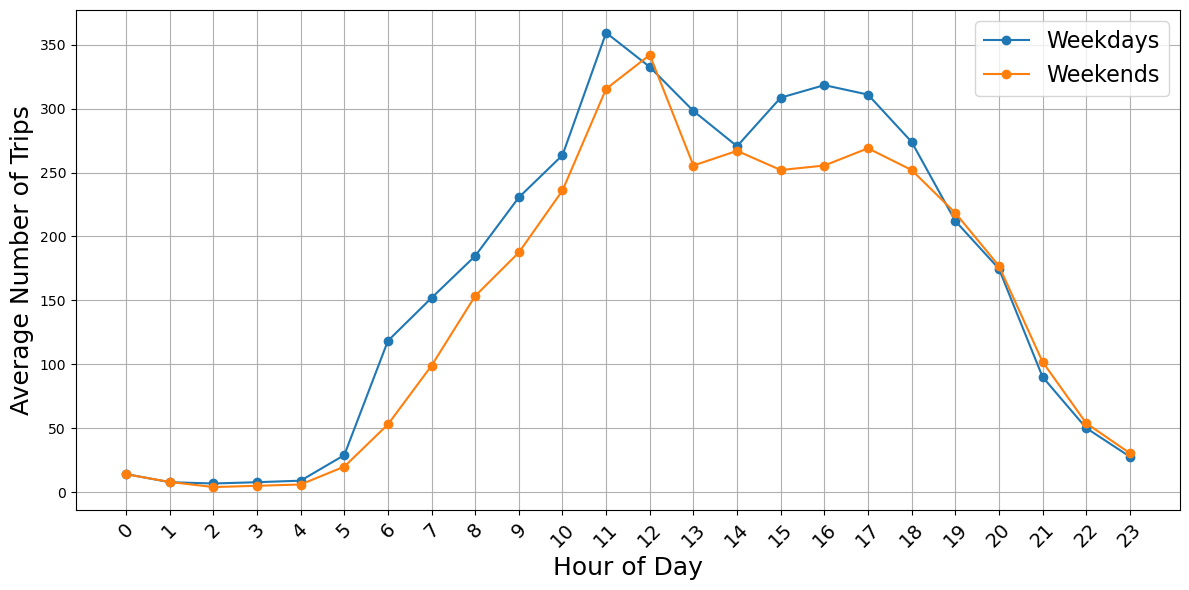

In [34]:
# Create a time series plot for weekdays and weekends
plt.figure(figsize=(12, 6))

# Plot for weekdays
plt.plot(average_weekdays.index, average_weekdays.values, marker='o', label='Weekdays')

# Plot for weekends
plt.plot(average_weekends.index, average_weekends.values, marker='o', label='Weekends')


# plt.title('Average Ride-Hailing Trips Count by Hour - Weekdays vs Weekends')
plt.xlabel('Hour of Day', fontsize=18)
plt.ylabel('Average Number of Trips', fontsize=18)
plt.xticks(range(24), rotation=45, fontsize=14)
# Enlarge the legend and adjust font size
plt.legend(fontsize=16)
# Display both x and y grids
plt.gca().xaxis.grid(True)
plt.gca().yaxis.grid(True)
plt.tight_layout()
plt.show()


Jenis pesanan

In [18]:
grouped_data_week_order = df.groupby(['weekday', df['datetime_tugas'].dt.hour, 'jenis_pesanan'])['id'].count().unstack(level=1)

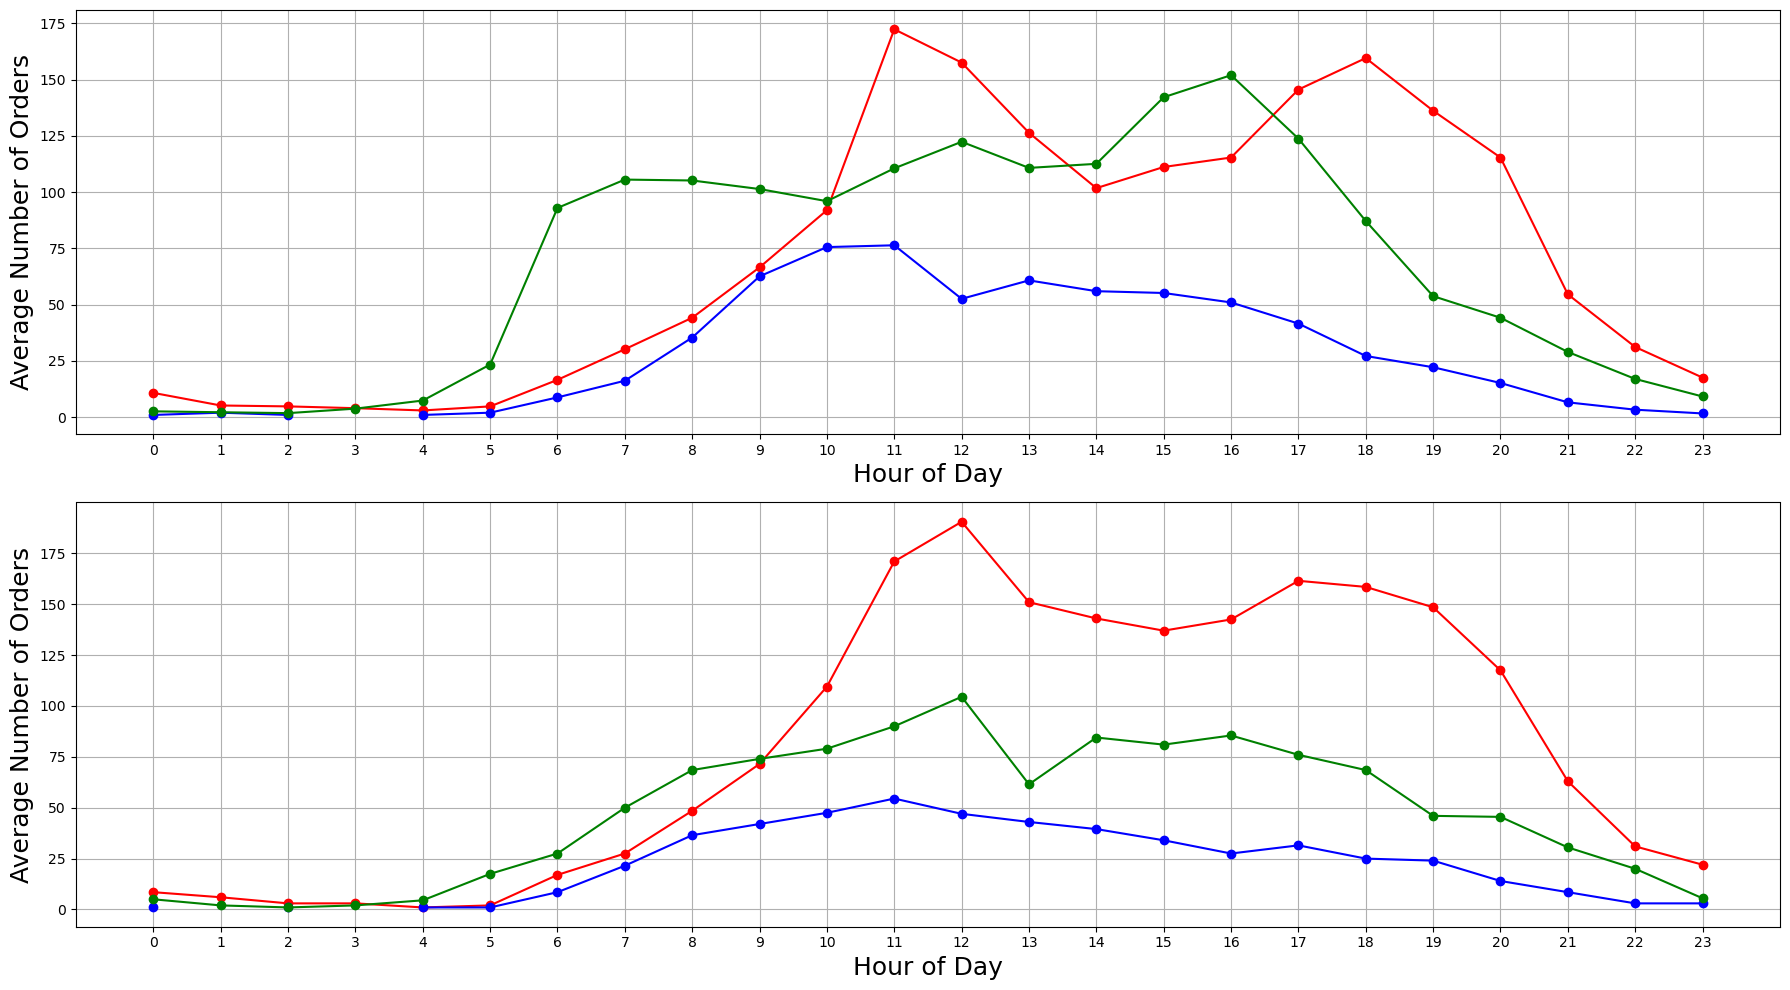

In [20]:
# Calculate average trip counts for weekdays and weekends, for each order type
average_weekdays = grouped_data_week_order.loc[0:4].groupby('jenis_pesanan').mean()
average_weekends = grouped_data_week_order.loc[5:6].groupby('jenis_pesanan').mean()

# Define custom colors for each trip type
colors = {'Food': 'red', 'Ride': 'green', 'Kurir Barang': 'blue'}
labels = {'Food': 'Food Delivery', 'Ride': 'Ride', 'Kurir Barang': 'Package Delivery'}

# Create two separate plots for weekdays and weekends
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10))

# Plot for weekdays
for order_type, data in average_weekdays.iterrows():
    ax1.plot(data.index, data.values, marker='o', label=labels.get(order_type, order_type), color=colors.get(order_type, 'black'))
ax1.set_xlabel('Hour of Day', fontsize=18)
ax1.set_ylabel('Average Number of Orders', fontsize=18)
ax1.set_xticks(range(24))
# ax1.set_title('Average Ride-Hailing Trips Count by Hour - Weekdays')
#ax1.legend(title='Order Type', fontsize=18)
ax1.grid(True)

# Plot for weekends
for order_type, data in average_weekends.iterrows():
    ax2.plot(data.index, data.values, marker='o', label=labels.get(order_type, order_type), color=colors.get(order_type, 'black'))
ax2.set_xlabel('Hour of Day', fontsize=18)
ax2.set_ylabel('Average Number of Orders', fontsize=18)
ax2.set_xticks(range(24))
# ax1.set_title('Average Ride-Hailing Trips Count by Hour - Weekdays')
# ax2.legend(title='Order Type', fontsize=18)
ax2.grid(True)

plt.tight_layout()
plt.show()


4.  Create aggregated dataset for space-time

In [81]:
grouped_data_hour = df.groupby([df['datetime_tugas'].dt.hour])['id'].count()

In [82]:
grouped_data_hour

datetime_tugas
0       99
1       55
2       42
3       49
4       57
5      185
6      698
7      958
8     1231
9     1528
10    1790
11    2428
12    2347
13    2002
14    1887
15    2047
16    2103
17    2093
18    1874
19    1498
20    1228
21     655
22     359
23     200
Name: id, dtype: int64